# Linear SVM - Email Spam Classifier


In this section, we'll build a linear SVM classifier to classify emails into spam and ham. The dataset, taken from the UCI ML repository, contains about 4600 emails labelled as **spam** or **ham**. 

The dataset can be downloaded here: https://archive.ics.uci.edu/ml/datasets/spambase

### Data Understanding

Let's first load the data and understand the attributes meanings, shape of the dataset etc.

# Email Spam Ham Classifier

In [1]:
#importing requires libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

#To supress warnings
import warnings
warnings.filterwarnings('ignore')

G:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#load the datset
email_rec=pd.read_csv("spam.txt",sep=',',header=None)
email_rec.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


**Mainly we will focus on three kinds of features are there:**
- Word frequency
- Ocurrence of special chracters
- Upper case letters frequency

As of now, the columns are named as integers. Let's manually name the columns appropriately (column names are available at the UCI website here: https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names)

In [3]:
# renaming the columns
email_rec.columns  = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", 
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", 
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", 
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", 
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", 
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", 
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", 
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", 
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", 
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average", 
                      "capital_run_length_longest", "capital_run_length_total", "spam"]
print(email_rec.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

In [4]:
#shape of dataset
email_rec.shape

(4601, 58)

In [5]:
#get an overview fir dataset
email_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [6]:
#check for the missing values
email_rec.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [7]:
# get statistical summary
email_rec['spam'].describe()

count    4601.000000
mean        0.394045
std         0.488698
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: spam, dtype: float64

From the above analysis we can tell that there are no missing value and the dataset is balanced.

### Data Preparation

In [8]:
#splitting into X and y
X=email_rec.drop("spam",axis=1)
y=email_rec['spam'].values.astype(int)

In [9]:
#Scaling the features
from sklearn.preprocessing import scale
X = scale(X)

In [10]:
#split into train test set
X_train , X_test , y_train , y_test =train_test_split(X , y , test_size=0.3 , random_state=4)

In [11]:
# confirming after the split also dataset is balanced
y_train.mean()
y_test.mean()

0.38522809558291093

### Model building

In [12]:
#instantiate an object of class SVC()

#we are using cost C=1
model =SVC(C=1)

#fitting on training set
model.fit(X_train , y_train)

#predicting on test set
y_pred = model.predict(X_test)

In [13]:
from sklearn import metrics
metrics.confusion_matrix(y_true=y_test , y_pred=y_pred)

array([[811,  38],
       [ 61, 471]], dtype=int64)

In [14]:
#check for other metrics to see model performance

print("accuracy :" ,metrics.accuracy_score(y_test , y_pred))
print("Precison :" ,metrics.precision_score(y_test , y_pred))
print("recall :" ,metrics.recall_score(y_test , y_pred))

accuracy : 0.9283128167994207
Precison : 0.925343811394892
recall : 0.8853383458646616


The SVM we have built so far gives decently good results - an accuracy of 92%, sensitivity/recall (TNR) of 88%. 

### Interpretation of Results

In the confusion matrix, the elements at (0, 0) and (1,1) correspond to the more frequently occurring class, i.e. ham emails. Thus, it implies that:
- 92% of all emails are classified correctly
- 88.5% of spams are identified correctly (sensitivity/recall)
- Specificity, or % of hams classified correctly, is 95%


## HyperParameter tunning

### K-Fold Cross Validation

Let's first run a simple k-fold cross validation to get a sense of the **average metrics** as computed over multiple *folds*. the easiest way to do cross-validation is to use the ```cross_val_score()``` function.

In [15]:
#Creating a K-Fold object with 5 splits
folds= KFold(n_splits=5 , shuffle = True ,random_state=4 )

#instantiating a SVC object with cost =1
model =  SVC(C=1)

In [16]:
# computing the cross-validation scores 
# note that the argument cv takes the 'folds' object, and
# we have specified 'accuracy' as the metric

cv_results= cross_val_score(model , X_train , y_train , cv=folds , scoring = 'accuracy')

In [17]:
#print 5 accuracies from 5 folds

print(cv_results)

print('mean accuracy :',format(cv_results.mean()))

[0.91770186 0.93944099 0.91925466 0.93012422 0.94254658]
mean accuracy : 0.9298136645962731


### GridSearchCV to find optimal parameter C

K-fold CV helps us compute average metrics over multiple folds, and that is the best indication of the 'test accuracy/other metric scores' we can have. 

But we want to use CV to compute the optimal values of hyperparameters (in this case, the cost C is a hyperparameter). This is done using the ```GridSearchCV()``` method, which computes metrics (such as accuracy, recall etc.) 

In this case, we have only one hyperparameter, though you can have multiple, such as C and gamma in non-linear SVMs. In that case, you need to search through a *grid* of multiple values of C and gamma to find the optimal combination, and hence the name GridSearchCV.

In [18]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

model = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True) 

In [19]:
#fit the model - it will fit 5 folds across the values of C

model_cv.fit(X_train , y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   20.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid={'C': [0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [20]:
#results of Grid Search CV 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.713599,0.097434,0.140618,0.047392,0.1,{'C': 0.1},0.895963,0.900621,0.906832,0.902174,...,0.905280,0.008505,5,0.912267,0.911491,0.912267,0.911491,0.906056,0.910714,0.002355
1,0.384367,0.027244,0.062484,0.000007,1,{'C': 1},0.917702,0.939441,0.919255,0.930124,...,0.929814,0.010130,2,0.951863,0.945652,0.950699,0.946040,0.943711,0.947593,0.003135
2,0.371860,0.057100,0.053122,0.007662,10,{'C': 10},0.909938,0.944099,0.933230,0.928571,...,0.931056,0.011809,1,0.973991,0.970497,0.973602,0.968944,0.970885,0.971584,0.001924
3,0.393729,0.037507,0.046869,0.000012,100,{'C': 100},0.914596,0.925466,0.936335,0.930124,...,0.928571,0.008098,3,0.989519,0.989519,0.989907,0.988354,0.988354,0.989130,0.000650
4,0.549963,0.110200,0.046871,0.000013,1000,{'C': 1000},0.908385,0.931677,0.923913,0.919255,...,0.920497,0.007569,4,0.996118,0.993789,0.994177,0.993789,0.993789,0.994332,0.000905


To get a better sense of how training and test accuracy varies with C, let's plot the tranining and test accuracies against C.

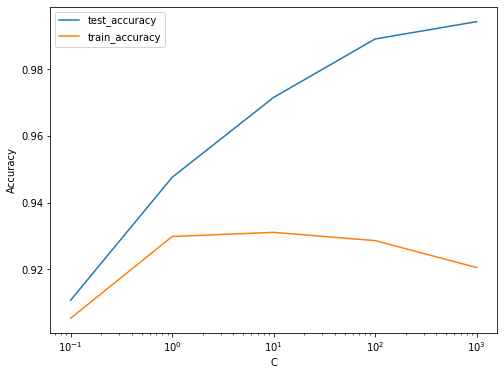

In [21]:
# plot of C versus train and test scores

plt.figure(figsize=(8,6))
plt.plot(cv_results['param_C'],cv_results['mean_train_score'])
plt.plot(cv_results['param_C'],cv_results['mean_test_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test_accuracy' , 'train_accuracy'] , loc='upper left')
plt.xscale('log')

Though the training accuracy monotonically increases with C, the test accuracy gradually reduces. Thus, we can conclude that higher values of C tend to **overfit** the model. This is because a high C value aims to classify all training examples correctly (since C is the *cost of misclassification* - if you impose a high cost on the model, it will avoid misclassifying any points by overfitting the data)

Let's finally look at the optimal C values found by GridSearchCV.

In [22]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.931055900621118 at C = 10


In [23]:
# model with C

model=SVC(C=best_C)

model.fit(X_train , y_train)

y_pred=model.predict(X_test)

In [24]:
# metrics
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.9304851556842868
precision 0.9241245136186771
recall 0.8928571428571429


### Optimising for Other Evaluation Metrics

In this case, we had optimised (tuned) the model based on overall accuracy, though that may not always be the best metric to optimise. For example, if we are concerned more about catching all spams (positives), we may want to maximise TPR or sensitivity/recall. If, on the other hand, we want to avoid classifying hams as spams (so that any important mails don't get into the spam box), we would maximise the TNR or specificity.

In [25]:
#specify params

params = {"C":[0.1 ,1 ,10 ,100 ,1000]}

# specify scores/metrics in an iterable
scores = ['accuracy' , 'precision' , 'recall']

for score in scores:
    
    print("#Tunning hyperparameters for metrics : {}".format(score))
    
    # set up GridSearch for score metric
    clf=GridSearchCV(SVC(),
                    params,
                    cv=folds,
                    scoring=score,
                    return_train_score=True)
    
    #fit
    clf.fit(X_train , y_train)
    
    print("The highest {0} score is {1} at C = {2}".format(score , clf.best_score_, clf.best_params_))
    print("\n")

#Tunning hyperparameters for metrics : accuracy
The highest accuracy score is 0.931055900621118 at C = {'C': 10}


#Tunning hyperparameters for metrics : precision
The highest precision score is 0.936509856470386 at C = {'C': 0.1}


#Tunning hyperparameters for metrics : recall
The highest recall score is 0.8994650196111064 at C = {'C': 10}




**Thus, we can see that the optimal value of the hyperparameter varies significantly with the choice of evaluation metric.**